## **Hyperparameter tuning on regression models applied on autompg dataset**

In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split , GridSearchCV , RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# metadata 
print(auto_mpg.metadata) 
  
# variable information 
print(auto_mpg.variables)

{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

In [50]:
X

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,140.0,4,86.0,2790,15.6,82,1
394,97.0,4,52.0,2130,24.6,82,2
395,135.0,4,84.0,2295,11.6,82,1
396,120.0,4,79.0,2625,18.6,82,1


In [51]:
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


In [52]:
df = X.join(y,how='left')

In [53]:
df

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,307.0,8,130.0,3504,12.0,70,1,18.0
1,350.0,8,165.0,3693,11.5,70,1,15.0
2,318.0,8,150.0,3436,11.0,70,1,18.0
3,304.0,8,150.0,3433,12.0,70,1,16.0
4,302.0,8,140.0,3449,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
393,140.0,4,86.0,2790,15.6,82,1,27.0
394,97.0,4,52.0,2130,24.6,82,2,44.0
395,135.0,4,84.0,2295,11.6,82,1,32.0
396,120.0,4,79.0,2625,18.6,82,1,28.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    int64  
 4   acceleration  392 non-null    float64
 5   model_year    392 non-null    int64  
 6   origin        392 non-null    int64  
 7   mpg           392 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


In [55]:
df.isnull().sum()

displacement    0
cylinders       0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64

### **No. of unique values each column of the dataset**

In [56]:
for i in df.columns:
    print(i,":",df[i].nunique())

displacement : 81
cylinders : 5
horsepower : 93
weight : 346
acceleration : 95
model_year : 13
origin : 3
mpg : 127


In [57]:
df.describe()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,194.411990,5.471939,104.469388,2977.584184,15.541327,75.979592,1.576531,23.445918
std,104.644004,1.705783,38.491160,849.402560,2.758864,3.683737,0.805518,7.805007
min,68.000000,3.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,105.000000,4.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,17.000000
50%,151.000000,4.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,22.750000
75%,275.750000,8.000000,126.000000,3614.750000,17.025000,79.000000,2.000000,29.000000
max,455.000000,8.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


In [58]:
df.dropna(inplace=True)

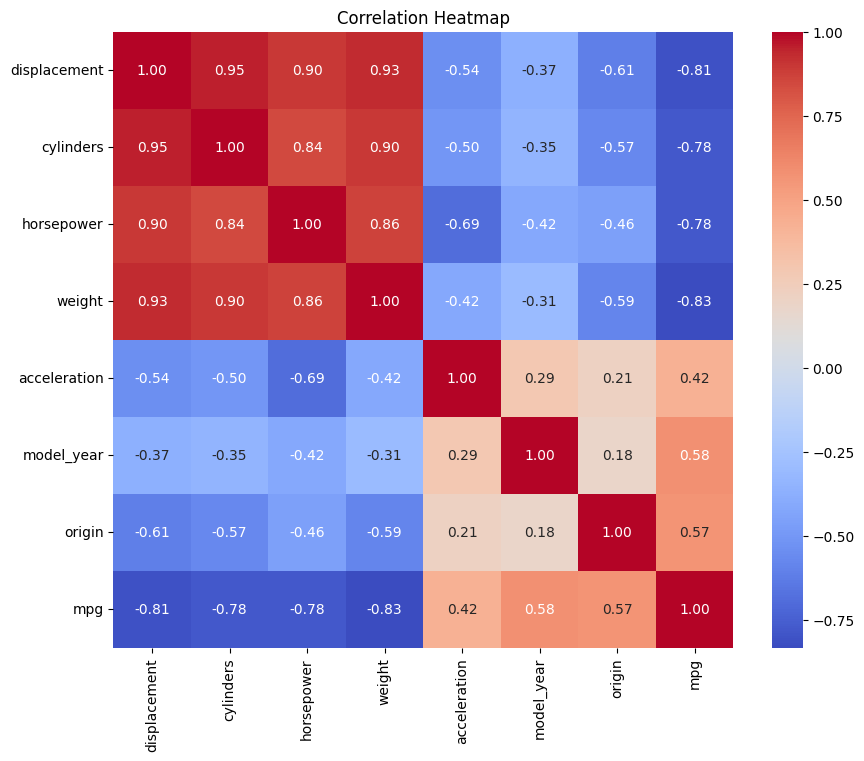

In [59]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


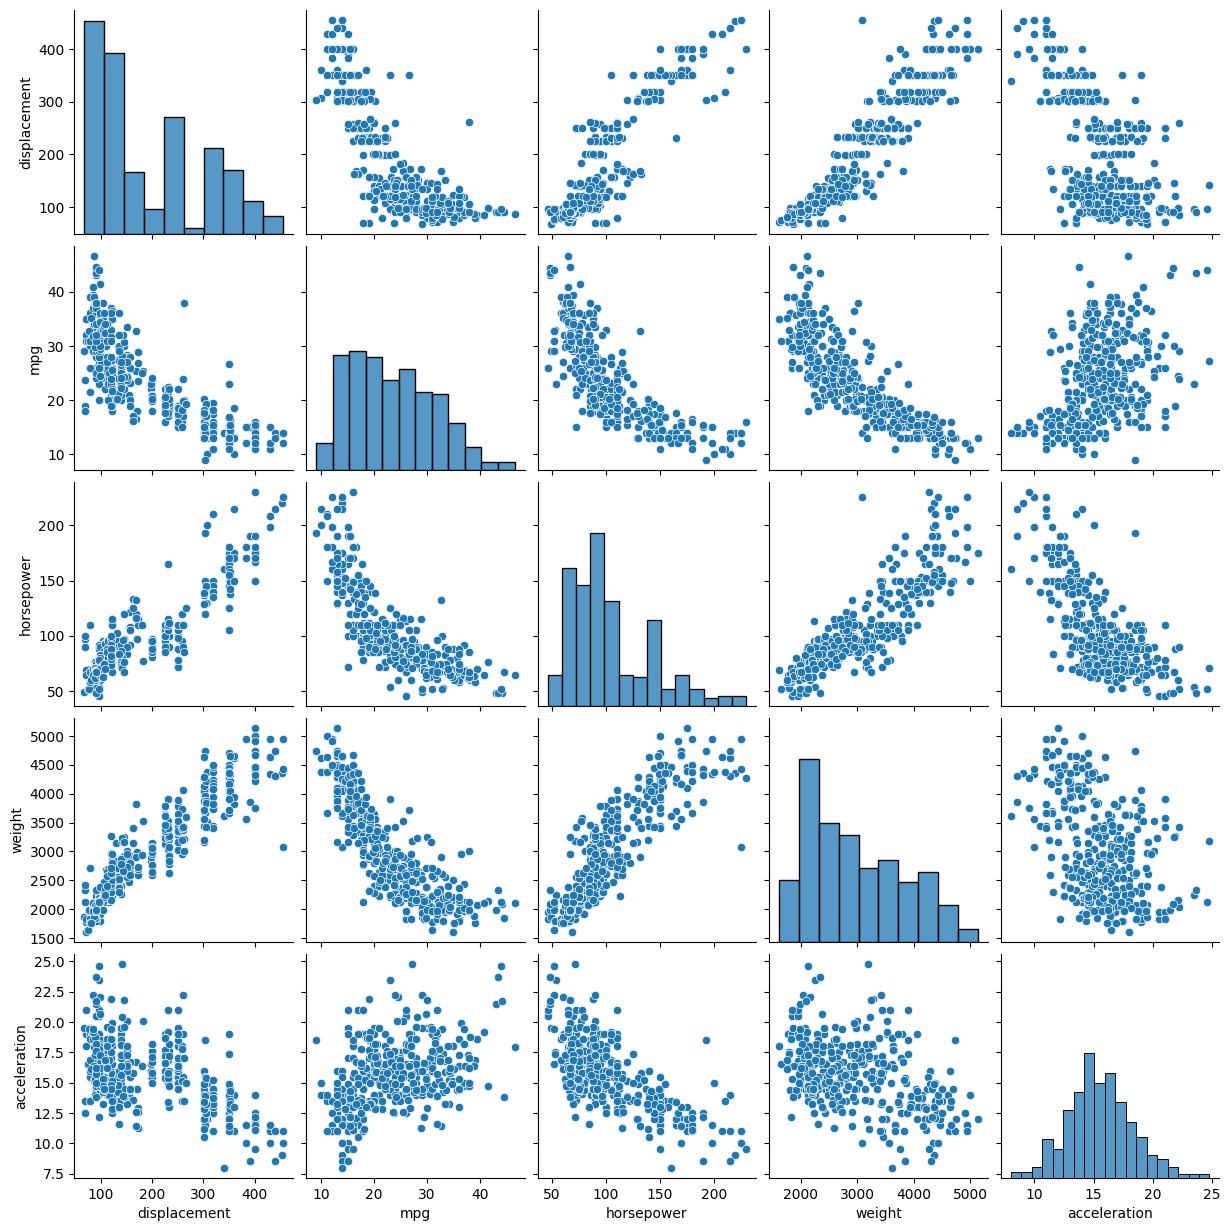

In [33]:
sns.pairplot(df, vars=['displacement','mpg','horsepower','weight','acceleration'])
plt.show()

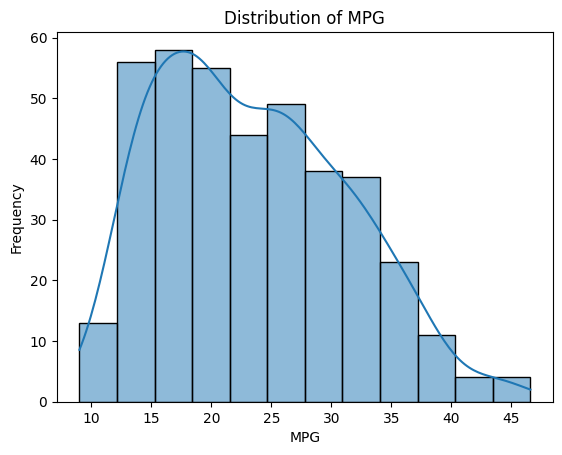

In [60]:
sns.histplot(df['mpg'], kde=True)
plt.title('Distribution of MPG')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.show()

### **Feature selection**

In [66]:
X = df.drop('mpg', axis=1)
y = df['mpg']

In [67]:
X_train, X_test , y_train , y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [68]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### **Linear Regression**

In [69]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [70]:
print(f"Linear Regression - RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"Linear Regression - R2 Score: {r2_score(y_test, y_pred)}")

Linear Regression - RMSE: 3.272745700300956
Linear Regression - R2 Score: 0.7901500386760345


### **Ridge Regression**

In [71]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

print(f"Ridge Regression - RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge))}")
print(f"Ridge Regression - R2 Score: {r2_score(y_test, y_pred_ridge)}")

Ridge Regression - RMSE: 3.281370077174323
Ridge Regression - R2 Score: 0.7890425833738295


### **Lasso Regression**

In [72]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)

print(f"Lasso Regression - RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso))}")
print(f"Lasso Regression - R2 Score: {r2_score(y_test, y_pred_lasso)}")

Lasso Regression - RMSE: 3.302615535787308
Lasso Regression - R2 Score: 0.786302023118252


### **Decision Tree Regression**

In [73]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)

print(f"Decision Tree - RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_tree))}")
print(f"Decision Tree - R2 Score: {r2_score(y_test, y_pred_tree)}")

Decision Tree - RMSE: 3.435868139701773
Decision Tree - R2 Score: 0.7687097379365908


### **Random Forest Regression**

In [74]:
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)
y_pred_forest = forest_reg.predict(X_test)

print(f"Random Forest - RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_forest))}")
print(f"Random Forest - R2 Score: {r2_score(y_test, y_pred_forest)}")

Random Forest - RMSE: 2.369639888787249
Random Forest - R2 Score: 0.8899857163437372


### **Comparison of the models**

In [75]:
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 
          'Decision Tree', 'Random Forest']

rmse_scores = [
    np.sqrt(mean_squared_error(y_test, y_pred)),
    np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
    np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
    np.sqrt(mean_squared_error(y_test, y_pred_tree)),
    np.sqrt(mean_squared_error(y_test, y_pred_forest)),
]

r2_scores = [
    r2_score(y_test, y_pred),
    r2_score(y_test, y_pred_ridge),
    r2_score(y_test, y_pred_lasso),
    r2_score(y_test, y_pred_tree),
    r2_score(y_test, y_pred_forest),
]

performance_df = pd.DataFrame({
    'Model': models,
    'RMSE': rmse_scores,
    'R2 Score': r2_scores
})

print(performance_df)

               Model      RMSE  R2 Score
0  Linear Regression  3.272746  0.790150
1   Ridge Regression  3.281370  0.789043
2   Lasso Regression  3.302616  0.786302
3      Decision Tree  3.435868  0.768710
4      Random Forest  2.369640  0.889986


#### **The best performing model is the Random Forest regressor with the least RMSE score and the highest R2 score .**
#### So we will apply hyperparameter tuning on this model only

## **Hyperparameter Tuning**

In [77]:
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400, 500,800,100,1200,14000,1600,1800,2000],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10,15],
    'min_samples_leaf': [1, 2, 4,6,8],
    'bootstrap': [True, False],
    'criterion': ['squared_error','absolute_error']
}

In [78]:
rf_random = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

In [81]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         500, 800, 100, 1200,
                                                         14000, 1600, 1800,
                                                         2000]},
                   random_state=42, verbose=2)

In [83]:
best_rf_random = rf_random.best_estimator_
y_pred_rf_random = best_rf_random.predict(X_test)
rmse_rf_random = np.sqrt(mean_squared_error(y_test, y_pred_rf_random))
r2_rf_random = r2_score(y_test, y_pred_rf_random)

In [84]:
print(f"Randomized Search - Best Random Forest RMSE: {rmse_rf_random}")
print(f"Randomized Search - Best Random Forest R2 Score: {r2_rf_random}")

Randomized Search - Best Random Forest RMSE: 2.3264289267090237
Randomized Search - Best Random Forest R2 Score: 0.8939614085992413


In [85]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 30,
 'criterion': 'squared_error',
 'bootstrap': False}

### **Grid Search**

In [87]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)



print(f"Best Grid Search Parameters: {grid_search.best_params_}")
print(f"Best Grid Search Score: {grid_search.best_score_}")


best_rf_grid = grid_search.best_estimator_
y_pred_grid = best_rf_grid.predict(X_test)


print(f"Grid Search RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_grid))}")
print(f"Grid Search R2 Score: {r2_score(y_test, y_pred_grid)}")

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Grid Search Parameters: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Grid Search Score: 0.8595154607088384
Grid Search RMSE: 2.495964165975705
Grid Search R2 Score: 0.8779434574922929


### **We can infer that Randomsearch cv gives us the best optimised and hyperparameter tuned model on the basis of the printed scores .**